In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget

In [2]:
states = []
for i in range(12, 22):
    for j in range(1, 11):
        for k in range(2):
            states.append((i, j, k))

In [3]:
print(f"Total states: {len(states)}")

Total states: 200


In [4]:
def dealerVal(dealer_faceup_card):
    cards = [2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 1]
    second_card = np.random.choice(cards)
    val = 0
    if dealer_faceup_card == 1:
        usableAce = 1
        val += 11
        val += second_card
    elif second_card == 1:
        usableAce = 1
        val += 11
        val += dealer_faceup_card
    else:
        usableAce = 0
        val = dealer_faceup_card + second_card
    
    while val < 17:
        card = np.random.choice(cards)
        
        if card + val > 21:
            if usableAce == 1:
                val = val + card - 10
            else:
                return card + val
        val += card
    return val    

In [5]:
dealerVal(12)

21

In [6]:
def envStep(state, action):
    val = state[0]
    dealer_faceup_card = state[1]
    usableAce = state[2]
    # Ace is valued as 1 as we have states for usable Aces already
    cards = [2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 1]
    reward = 0
    terminated = False
    checkToggle = False
    if action == "hit":
        card = np.random.choice(cards)
        if card + val > 21:
            if usableAce == 1:
                val = card + val - 10
                usableAce = 0 # We don't have an usable Ace anymore!
                if val == 21:
                    checkToggle = True
            else:
                val += card
                checkToggle = True
                usableAce = 1
                terminated = True
        else:
            val = card + val

    if action == "stick" or checkToggle == True:
        dealer_val = dealerVal(dealer_faceup_card)
        if val == 21:
            if dealer_val == 21:
                reward = 0
            else:
                reward = 1

        elif val > 21:
            if dealer_val > 21:
                reward = 0
            else:
                reward = -1
            
        else: # Value is less than 21
            if dealer_val == 21:
                reward = -1
            if dealer_val > 21:
                reward = 1
            else: # Both dealer's and our sum is less than 21
                if val > dealer_val:
                    reward = 1
                elif val == dealer_val:
                    reward = 0
                else:
                    reward = -1
        terminated = True
        
    return (val, dealer_faceup_card, usableAce), reward, terminated


In [7]:
pi = {state: "hit" for state in states}
for state in states:
    if state[0] == 20 or state[0] == 21:
        pi[state] = "stick"

In [8]:
Values = np.zeros((10, 10, 2))
alpha = 0.1
state_counter = {state: 0 for state in states}

for i in range(10000):
    reached_states = []
    state = states[np.random.randint(200)]
    terminated = False
    returns = 0
    while not terminated:
        reached_states.append(state)
        state, reward, terminated = envStep(state, pi[state])
        returns += reward

    for state in reached_states:
        state_counter[state] += 1
        idx_playersum = state[0] - 12
        idx_dealer_fu_card = state[1] - 1
        idx_usableace = state[2]
        Values[idx_playersum, idx_dealer_fu_card, idx_usableace] += (returns - Values[idx_playersum, idx_dealer_fu_card, idx_usableace])/state_counter[state]

In [9]:
Values.min()

-0.6708860759493669

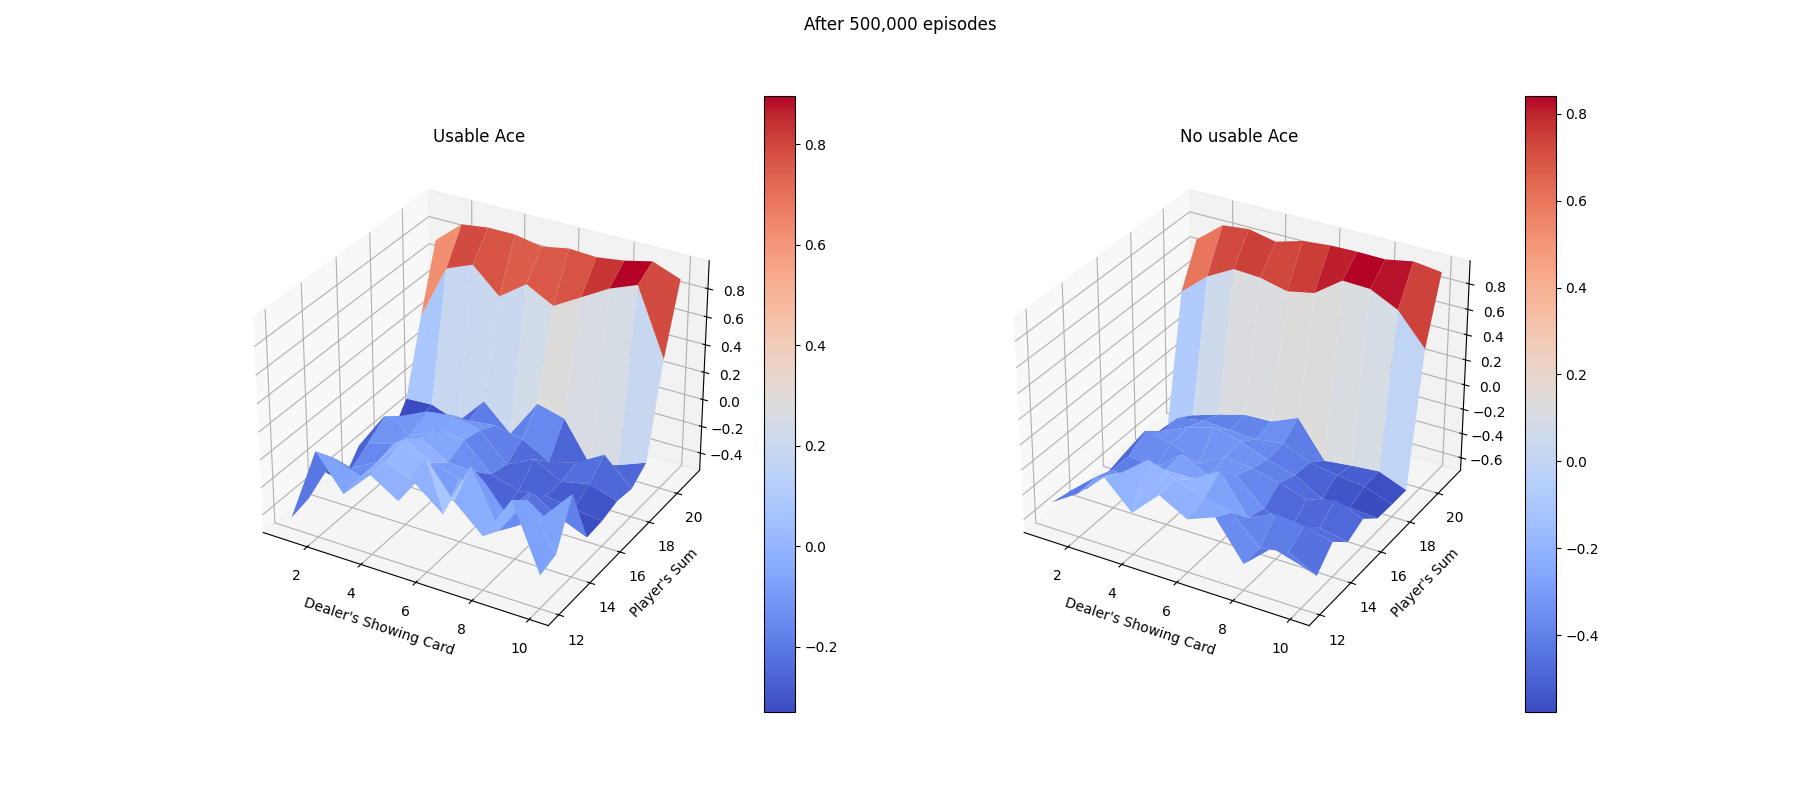

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8), subplot_kw={"projection": "3d"})
fig.suptitle("After 500,000 episodes")
for ax in axes.flatten():
    ax.set_xlabel("Dealer's Showing Card")
    ax.set_ylabel("Player's Sum")
axes[0].set_title("Usable Ace")
axes[1].set_title("No usable Ace")
x = np.arange(1, 11)
y = np.arange(12, 22)
x, y = np.meshgrid(x, y)
a = axes[0].plot_surface(x, y, Values[:, :, 1], cmap='coolwarm')
b = axes[1].plot_surface(x, y, Values[:, :, 0], cmap='coolwarm')
fig.colorbar(a)
fig.colorbar(b)

In [11]:
Values = np.zeros((10, 10, 2))
alpha = 0.1
state_counter = {state: 0 for state in states}

for i in range(500000):
    reached_states = []
    state = states[np.random.randint(200)]
    terminated = False
    returns = 0
    while not terminated:
        reached_states.append(state)
        state, reward, terminated = envStep(state, pi[state])
        returns += reward

    for state in reached_states:
        state_counter[state] += 1
        idx_playersum = state[0] - 12
        idx_dealer_fu_card = state[1] - 1
        idx_usableace = state[2]
        Values[idx_playersum, idx_dealer_fu_card, idx_usableace] += (returns - Values[idx_playersum, idx_dealer_fu_card, idx_usableace])/state_counter[state]

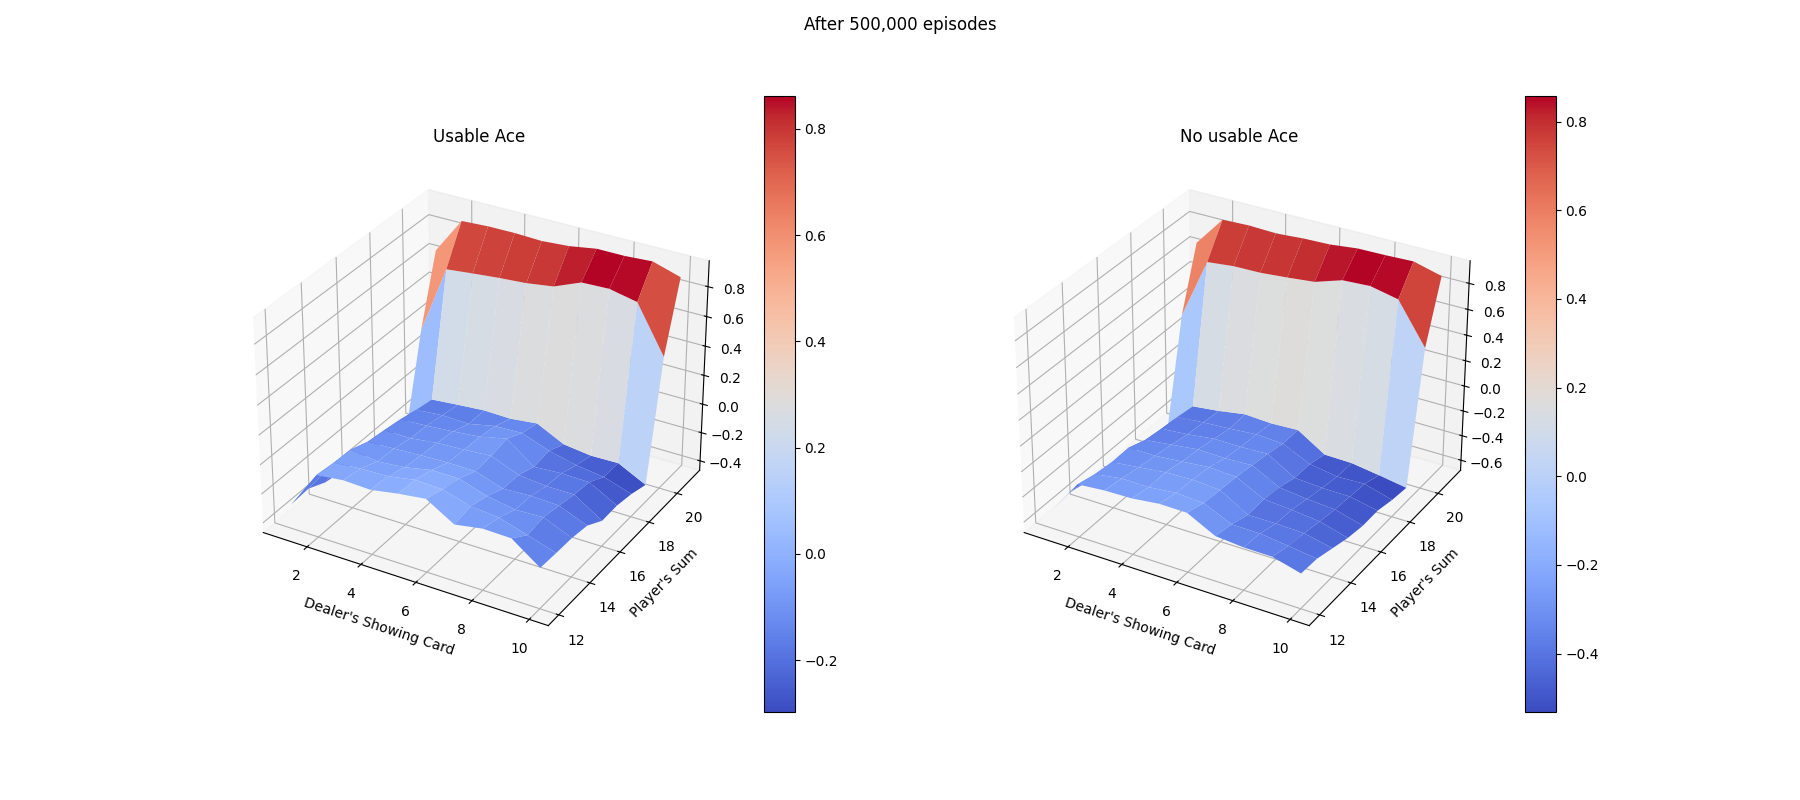

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8), subplot_kw={"projection": "3d"})
fig.suptitle("After 500,000 episodes")
for ax in axes.flatten():
    ax.set_xlabel("Dealer's Showing Card")
    ax.set_ylabel("Player's Sum")
axes[0].set_title("Usable Ace")
axes[1].set_title("No usable Ace")
x = np.arange(1, 11)
y = np.arange(12, 22)
x, y = np.meshgrid(x, y)
a = axes[0].plot_surface(x, y, Values[:, :, 1], cmap='coolwarm')
b = axes[1].plot_surface(x, y, Values[:, :, 0], cmap='coolwarm')
fig.colorbar(a)
fig.colorbar(b)